In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from pylab import plot, show
%matplotlib inline

In [2]:
df_bank=pd.read_csv('bank-additional-full.csv', sep=';')
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<AxesSubplot:xlabel='emp.var.rate', ylabel='count'>

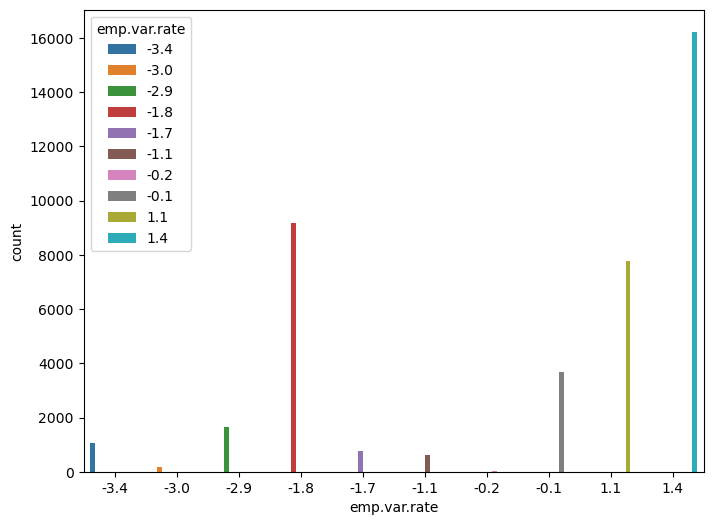

In [3]:
#plotting employment variation rate - quarterly indicator emp.var.rate
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='emp.var.rate', hue='emp.var.rate', data=df_bank)

<AxesSubplot:xlabel='previous', ylabel='count'>

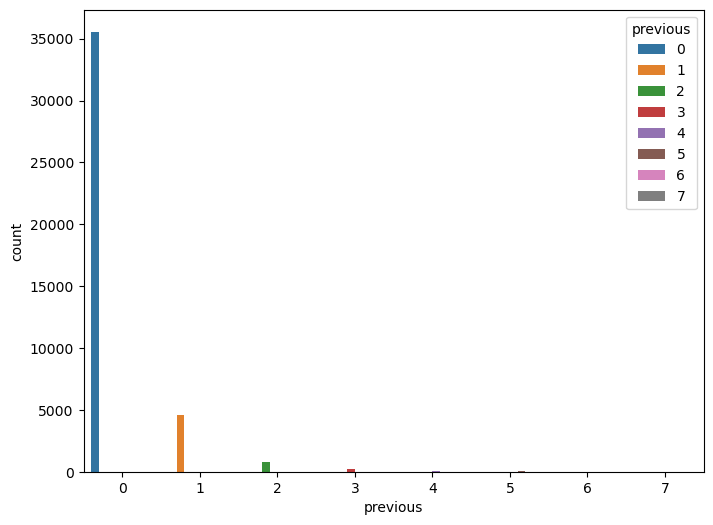

In [4]:
#previous: number of contacts performed before this campaign and for this client (numeric)
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='previous',hue='previous',data=df_bank)

<AxesSubplot:xlabel='duration'>

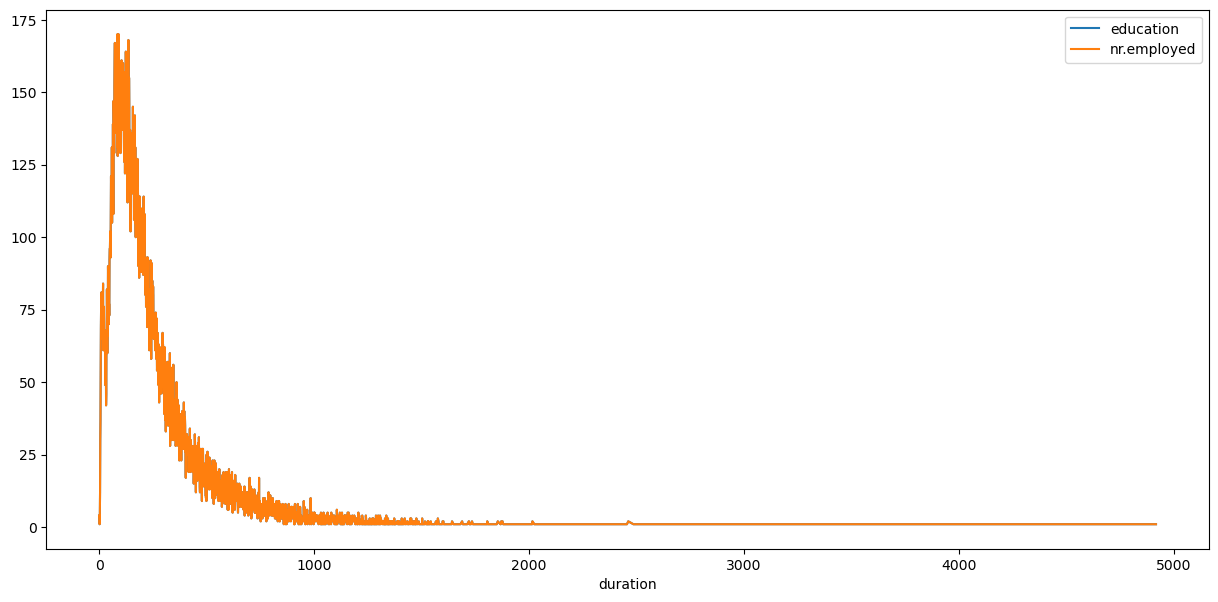

In [5]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df_bank.groupby(['duration']).count()[['education','nr.employed']].plot(ax=ax)

<AxesSubplot:>

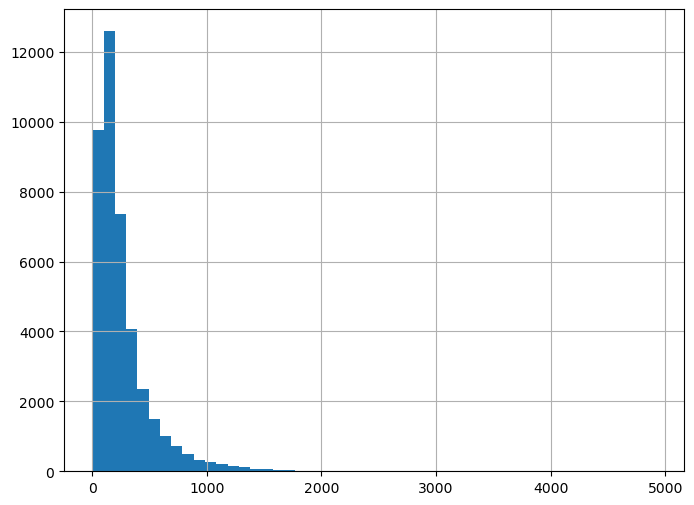

In [6]:
# Another way to plot a histogram of duration is shown below
df_bank['duration'].hist(bins=50)

In [7]:
#Describing dummy keys of particular column
y_n_lookup ={'yes' : 1, 'no' : 0}
df_bank['y_dummy'] = df_bank['y'].map(lambda x: y_n_lookup[x])
df_bank['y_dummy'].value_counts()

0    36548
1     4640
Name: y_dummy, dtype: int64

In [8]:
#getting marital status of groupby people
age_group_names = ['young', 'lower middle', 'middle', 'senior']
df_bank['age_binned'] = pd.qcut(df_bank['age'], 4, labels = age_group_names)
df_bank['age_binned'].value_counts()
gb_marital_age = df_bank['y_dummy'].groupby([df_bank['marital'],df_bank['age_binned']] ) 
gb_marital_age.mean()

marital   age_binned  
divorced  young           0.074148
          lower middle    0.093649
          middle          0.082001
          senior          0.134097
married   young           0.098465
          lower middle    0.092071
          middle          0.075517
          senior          0.135865
single    young           0.166407
          lower middle    0.117267
          middle          0.087753
          senior          0.108974
unknown   young           0.250000
          lower middle    0.041667
          middle          0.333333
          senior          0.115385
Name: y_dummy, dtype: float64

In [9]:
#unstack (Pivot a level of the (necessarily hierarchical) index labels) groupby marital status
gb_marital_age.mean().unstack()

age_binned,young,lower middle,middle,senior
marital,,,,
divorced,0.074148,0.093649,0.082001,0.134097
married,0.098465,0.092071,0.075517,0.135865
single,0.166407,0.117267,0.087753,0.108974
unknown,0.250000,0.041667,0.333333,0.115385


In [10]:
#getting life stage of age group
df_bank['life_stage'] = df_bank.apply(lambda x: x['age_binned'] +' & ' + x['marital'], axis = 1)
df_bank['life_stage'].value_counts() 

senior & married           7478
middle & married           7111
young & single             6418
lower middle & married     6104
young & married            4235
lower middle & single      2942
senior & divorced          1745
middle & single            1584
middle & divorced          1439
lower middle & divorced     929
senior & single             624
young & divorced            499
senior & unknown             26
lower middle & unknown       24
young & unknown              24
middle & unknown              6
Name: life_stage, dtype: int64

In [11]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_dummy',
       'age_binned', 'life_stage'],
      dtype='object')

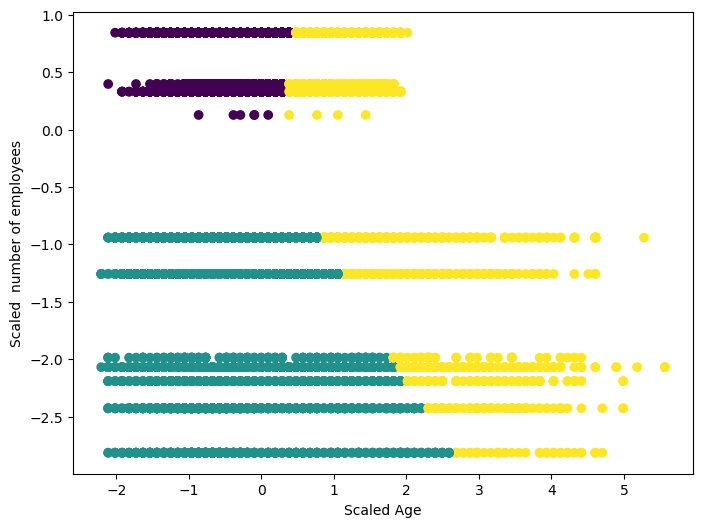

In [12]:
from sklearn import preprocessing
from sklearn import cluster
import matplotlib.pyplot as plt
#getting the pattern of particular age range employee
combined_data = df_bank[['age','nr.employed']].values
combined_data_scaled = preprocessing.scale(combined_data)

# Applying KMeans algorithm
kmeans = cluster.KMeans(n_clusters = 3)
kmeans.fit(combined_data_scaled)
y_pred = kmeans.predict(combined_data_scaled)
#Plotting the graph
plt.scatter(combined_data_scaled[:, 0], combined_data_scaled[:, 1], c = y_pred)
plt.xlabel('Scaled Age')
plt.ylabel('Scaled  number of employees')
plt.show()

In [13]:
#Consider some important features
features_columns=['job','education', 'default', 'housing', 'loan',
           'month', 'day_of_week', 'duration', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m','y']

In [20]:
#importing the packeges
from IPython.core.interactiveshell import InteractiveShell     #An enhanced, interactive shell for Python
#‘all’, ‘last’, ‘last_expr’ or ‘none’, ‘last_expr_or_assign’
#specifying which nodes should be run interactively 
import plotly 
InteractiveShell.ast_node_interactivity = "all"   #Options:	'all','last','last_expr','none','last_expr_or_assign'

import numpy as np # linear algebra
import pandas as pd # data processing

In [21]:
#Encode the categorical data
for col in df_bank.columns:
    if df_bank[col].dtype==object:
           df_bank[col]=df_bank[col].astype('category')
           df_bank[col]=df_bank[col].cat.codes

In [22]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler
features_columns_df=df_bank[features_columns]
array = features_columns_df.values
# separate array into input and output components
X = array[:,0:15]
Y = array[:,15]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.273 0.    0.    0.    0.    0.667 0.25  0.053 1.    0.    0.5   0.938
  0.699 0.603 0.957]
 [0.636 0.429 0.5   0.    0.    0.667 0.25  0.03  1.    0.    0.5   0.938
  0.699 0.603 0.957]
 [0.636 0.429 0.    1.    0.    0.667 0.25  0.046 1.    0.    0.5   0.938
  0.699 0.603 0.957]
 [0.    0.143 0.    0.    0.    0.667 0.25  0.031 1.    0.    0.5   0.938
  0.699 0.603 0.957]
 [0.636 0.429 0.    0.    1.    0.667 0.25  0.062 1.    0.    0.5   0.938
  0.699 0.603 0.957]]


In [23]:

# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = features_columns_df.iloc[:,0:15]
Y = features_columns_df.iloc[:,15]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
rf = RandomForestClassifier(random_state = 42)  # random_state is the seed used by the random number generator
#fitting the model
model = rf.fit(X_train, y_train)
# Find feature importance, print it
raw_feature_importance = model.feature_importances_.tolist()
feature_importance = [round(val * 100.0, 2) for val in raw_feature_importance]
print(zip(features_columns_df.columns, feature_importance))

In [24]:
#Getting the score of feature matrix and its target values 
model.score(X_test,y_test)

0.909217979842566

In [25]:
from sklearn.metrics import classification_report
# Model Prediction 
predictions = model.predict(X_test)
#Print the classification report
print(classification_report(y_true =y_test,y_pred = predictions))
np.sum(predictions)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12105
           1       0.60      0.50      0.55      1488

    accuracy                           0.91     13593
   macro avg       0.77      0.73      0.75     13593
weighted avg       0.90      0.91      0.91     13593



1230

(0.0, 1.0)

(0.0, 1.0)

Text(0.5, 0, 'False Positive Rate or (1 - Specifity)')

Text(0, 0.5, 'True Positive Rate or (Sensitivity)')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

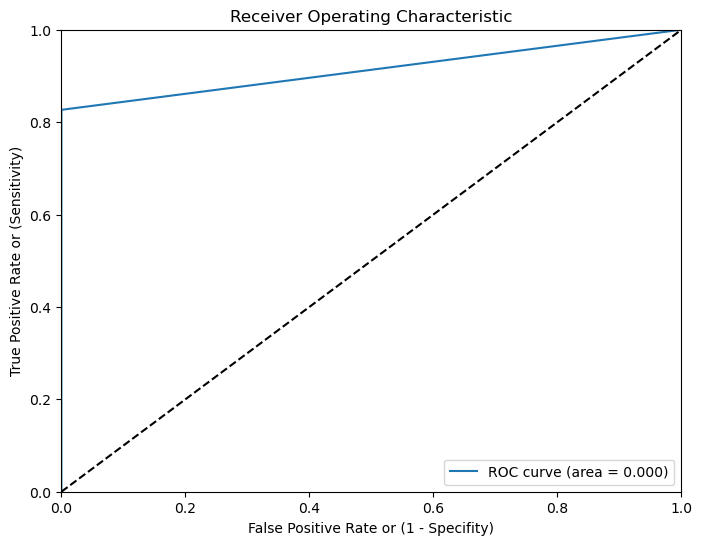

In [26]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_true=sorted(y_test)
y_score=sorted(predictions)
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(y_true, y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\ProgramData\Anaconda3\lib\site-packages

 LR : 0.906696 (0.004618)
 LDA : 0.907255 (0.004684)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:

 KNN : 0.902787 (0.003210)
 CART : 0.890672 (0.003372)
 NB : 0.845052 (0.004621)
 SVM : 0.904535 (0.005250)


Text(0.5, 0.98, ' Algorithm Comparison ')

{'whiskers': [<matplotlib.lines.Line2D at 0x25db72d9bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x25db72c5190>,
 'boxes': [<matplotlib.lines.Line2D at 0x25db72d98e0>,
 'medians': [<matplotlib.lines.Line2D at 0x25db72c5730>,
 'fliers': [<matplotlib.lines.Line2D at 0x25db72c5a00>,
 'means': []}

[Text(1, 0, ' LR '),
 Text(2, 0, ' LDA '),
 Text(3, 0, ' KNN '),
 Text(4, 0, ' CART '),
 Text(5, 0, ' NB '),
 Text(6, 0, ' SVM ')]

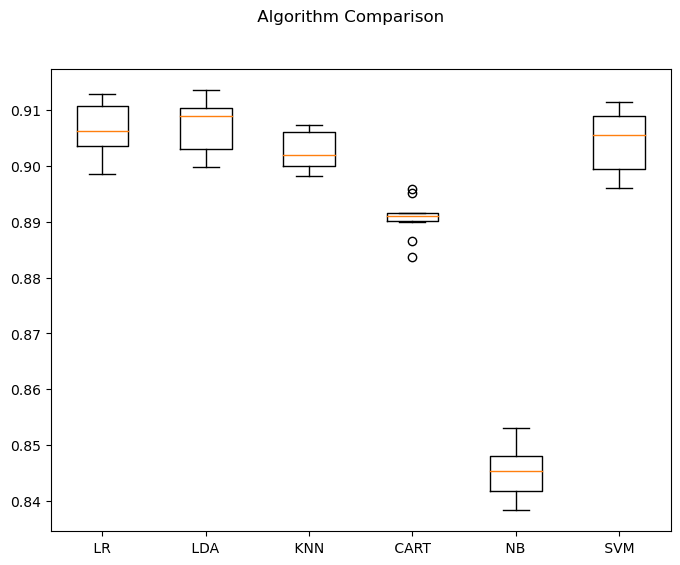

In [28]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# split data into X and y
X = features_columns_df.iloc[:,0:15]
Y = features_columns_df.iloc[:,15]
# prepare models
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' CART ' , DecisionTreeClassifier()))
models.append(( ' NB ' , GaussianNB()))
models.append(( ' SVM ' , SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()